In [1]:
import numpy as np
import pandas as pd
#from scipy.spatial import distance
import cv2
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
import glob
from sklearn import preprocessing
import os, sys
from PIL import Image
import csv
from scipy.spatial.distance import cdist



from numpy import asarray as ASARRAY
from sklearn.cluster import KMeans as KM
from cv2 import imread as IMREAD
from cv2 import cvtColor as CVT_COLOR
from cv2 import COLOR_BGR2GRAY
#cv2.ORB_create()
#from cv2.ORB_create import SIFT_create as SIFT_CREATE
from cv2.xfeatures2d import SIFT_create as SIFT_CREATE
from numpy import concatenate as CONCAT
from numpy import sum as SUM
from numpy import unique as UNIQUE
from glob import iglob as IGLOB
import math

In [25]:
def perform_sift(img_arr):
    sift = []
    img_len = []
    for j in img_arr:
        img = IMREAD(j)
        gray = CVT_COLOR(img, COLOR_BGR2GRAY)
        sift_kp, sift_descripter = SIFT_CREATE().detectAndCompute(gray, None)
        sift.append(sift_descripter)
        img_len.append(len(sift_descripter))
    return CONCAT(sift), img_len


def visual_bow(img_len, labels,M):
    data = np.zeros([len(img_len), M])
    for i, j in enumerate(img_len):
        temp = []
        if i == 0:
            for k in range(M):
                unique_elements, counts_elements = UNIQUE(labels[0: img_len[i]] == k, return_counts=True)
                if len(unique_elements) == 1 and unique_elements[0] == False:
                    temp.append(0)
                elif len(unique_elements) == 1 and unique_elements[0] == True:
                    temp.append(counts_elements[0])
                else:
                    temp.append(counts_elements[1])
        else:
            for k in range(M):
                unique_elements, counts_elements = UNIQUE(labels[img_len[i - 1]: img_len[i - 1] + img_len[i]] == k,
                                                          return_counts=True)
                if len(unique_elements) == 1 and unique_elements[0] == False:
                    temp.append(0)
                elif len(unique_elements) == 1 and unique_elements[0] == True:
                    temp.append(counts_elements[0])
                else:
                    temp.append(counts_elements[1])
        data[i] = temp
    return data


imgs = list()
for (dirpath, dirnames, filenames) in os.walk("./brain//"):
    for i, elem in enumerate(filenames):
        if (".jpg" in elem) or (".jpeg" in elem) :
            imgs += [os.path.join(dirpath, elem)]

sift , img_len = perform_sift(imgs)
M = 20
labels = KM(M, random_state=0).fit(sift)
labels = ASARRAY(labels.predict(sift)).reshape(1,len(sift))
data1 = visual_bow(img_len,labels[0],M)
pd.DataFrame(data1).to_csv(r"brain20.csv")

In [21]:

import pandas as pd
import numpy as np 

dat1 = np.genfromtxt("grand_piano30.csv", delimiter=',')
dat2 = np.genfromtxt("watch30.csv", delimiter=',')
dat3 = np.genfromtxt("motor30.csv", delimiter=',')
dat4 = np.genfromtxt("sunflower30.csv", delimiter=',')
# dat5 = np.genfromtxt("sunflower.csv", delimiter=',')


# appending the arrays with axis = 0 
arr3 = np.append(dat1, dat2, axis = 0)
arr4 = np.append(arr3, dat3, axis = 0)
# arr5 = np.append(arr4, dat4, axis = 0)
dataset_new = np.append(arr4, dat4, axis = 0)


pd.DataFrame(dataset_new).to_csv(r"4M_30D.csv")

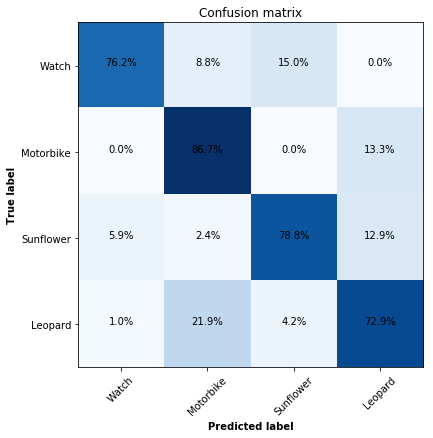

In [51]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm)) *1
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
 #   plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]*1


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.1%}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="black" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="black" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label', weight='bold')
    plt.xlabel('Predicted label', weight='bold')
    plt.show()
    
#    def myscores(cm): 
#        tp = cm[0][0] 
#        fp = cm[0][1] 
#        fn = cm[1][0] 
#        tn = cm[1][1] 
#        return tp/(tp+fp), tp/(tp+fn)
#
#    print("precision and recall:", myscores(cm))
    
    
    
plot_confusion_matrix(cm           = np.array([ [ 61 ,7, 12, 0],
                                                [ 0, 78 ,0, 12],
                                                [ 5, 2 ,67, 11],
                                                [ 1, 21 ,4, 70]]), 
                      normalize    = True,
                      target_names = ['Watch', 'Motorbike', 'Sunflower', 'Leopard'],
                      )    
